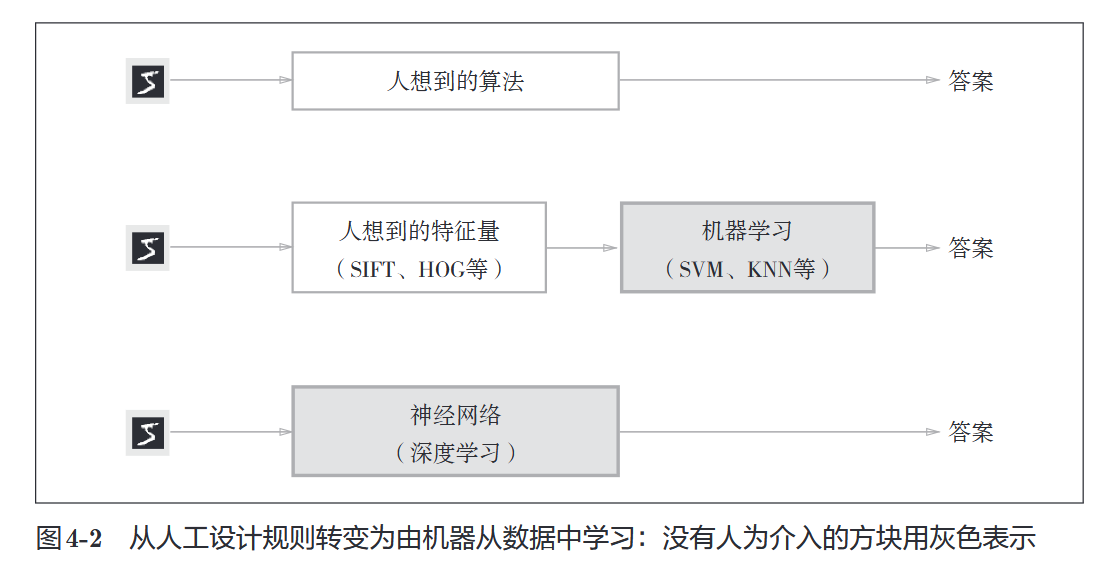

    神经网络可以将数据直接作为原始数据，进行“端对端”的学习

1.损失函数:均方误差和交叉熵误差
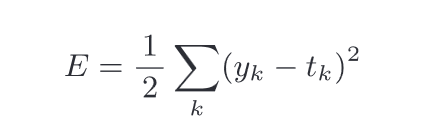

In [3]:
#均方误差
import numpy as np
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
# 设 “2” 为正确解
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
#例 1：“2” 的概率最高的情况（0.6）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t)) 

0.09750000000000003

In [4]:
# 例 2：“7” 的概率最高的情况（0.6）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
mean_squared_error(np.array(y), np.array(t)) #损失函数更大

0.5975

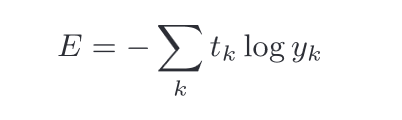

In [5]:
#交叉熵误差：交叉熵误差的值是由正确解标签所对应的输出结果决定的
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) #添加一个微小值可以防止负无限大的发生（np.log0）
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [6]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

In [7]:
#mini-batch学习:从训练数据中选出一批数据称为 mini-batch,小批量
#比如，从 60000 个训练数据中随机选择 100 笔，再用这 100 笔数据进行学习
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
load_mnist(normalize=True, one_hot_label=True)

print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000, 10)

train_size = x_train.shape[0]
batch_size = 10  #设置批次大小（每次训练时使用的样本数量）为10。这意味着每次迭代将使用10个样本来更新模型参数(抽十个)
batch_mask = np.random.choice(train_size, batch_size)  #np.random.choice() 可以从指定的数字中随机选择想要的数字;size = batch_size
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(batch_mask)
print(x_batch.shape)# 每一组数据是784维向量组成的，一共十个784
print(t_batch.shape) #十个10维向量，结果用one_hot表示
print(t_train)

(60000, 784)
(60000, 10)
[26631 29306 42787 45651 44721 45498 11887  3471 47674 26542]
(10, 784)
(10, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [8]:
np.random.choice(60000, 10)

array([ 9418, 36716, 44828, 25615, 17114, 18202, 54956, 40731,  7485,
       20756])

In [9]:
#独热编码的交叉熵损失  mini-batch
def cross_entropy_error_one_hot(y, t):
    if y.ndim == 1: #一维数组（单个样本）
        t = t.reshape(1, t.size) #重塑为1行、N列的二维数组
        y = y.reshape(1, y.size)
    batch_size = y.shape[0] #获取当前批次的样本数量，一维相当于除于1
    return -np.sum(t * np.log(y + 1e-7)) / batch_size

In [10]:
#eg：简单的分类问题，有3个类别（猫、狗、鸟）
import numpy as np
y = np.array([
    [0.1, 0.8, 0.1],   # 样本1：预测为狗的概率80%
    [0.9, 0.05, 0.05]   # 样本2：预测为猫的概率90%
])
# 真实标签 (one-hot编码)
t = np.array([
    [0, 1, 0],   # 样本1真实标签是狗1
    [1, 0, 0]    # 样本2真实标签是猫0
])
print(y.ndim) #y的维数
print(y.shape)
print(t.shape)
print(y.shape[0])

loss = cross_entropy_error_one_hot(y, t)
print(loss)

2
(2, 3)
(2, 3)
2
0.1642519154304695


In [11]:
#标签形式的交叉熵损失  mini-batch
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size) # t 变为 (1,)
        y = y.reshape(1, y.size) # y 变为 (1, K)

    batch_size = y.shape[0]   # 获取批量大小 N

    # 核心计算：提取每个样本在真实标签位置的预测概率
    selected_probs = y[np.arange(batch_size), t]  # 形状 (batch_size,)
    
    return -np.sum(np.log(selected_probs + 1e-7)) / batch_size

单个样本未reshape：
        y = [0.1, 0.8, 0.1]
        t = [0, 1, 0]

错误计算：
    batch_size = y.shape[0]  # = 3 (但实际只有1个样本)
    loss = -np.sum(t * np.log(y)) / batch_size  # 除以3而不是1 → 错误！

In [12]:
#eg1

import numpy as np
y = np.array([
    [0.1, 0.2, 0.6, 0.05, 0.05],  # 样本1的预测概率
    [0.7, 0.1, 0.1, 0.05, 0.05],  # 样本2的预测概率
    [0.1, 0.1, 0.1, 0.1, 0.6]     # 样本3的预测概率
])
print(np.arange(1))
print(np.arange(2))
y[np.arange(1),2] #np.arange(1)生成一个数组：[0]，实际上是在对y进行索引：y[[0], 2]

[0]
[0 1]


array([0.6])

In [13]:
#eg2： 转变为标签
import numpy as np
y=np.array([[0,1,0.1,0,0,0,0,0,0,0],
            [0,0,0.2,0.8,0,0,0,0,0,0]])
t_onehot=np.array([[0,1,0,0,0,0,0,0,0,0],
                   [0,0,0,1,0,0,0,0,0,0]])#one-hot
t = t_onehot.argmax(axis=1)#非one-hot，这一步是将one—hot里为1的项的索引提出来(按行方向找出)
print(t)#[1 3]，这时监督数据就变成了标签形式！！！（非 one-hot 表示，一般时直接给出来）
batch_size = y.shape[0]
print(y.shape)
print(batch_size)#2
k=y[np.arange(batch_size), t] # [y[0,1] y[1,3]],np.arange(batch_size)表示几个样本，t决定了正确的索引，最后识别出现的概率
print(k)#[1.  0.8]
log=np.log(k)
print(log)#[ 0.         -0.22314355]
r=-np.sum(np.log(y[np.arange(batch_size), t] + 1e-7))/ batch_size
print(r)#0.11157166315711126

[1 3]
(2, 10)
2
[1.  0.8]
[ 0.         -0.22314355]
0.11157166315711126


In [14]:
#eg3
import numpy as np
 
y = np.array([[0.1,0.05,0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0],
              [0.8,0.1,0.0,0.0,0.05,0.0,0.0,0.05,0.0,0.0],
              [0.0,0.1,0.1,0.0,0.0,0.05,0.05,0.7,0.0,0.0],
              [1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0],
              [0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.6]])
 
t_one_hot = np.array([[0,0,1,0,0,0,0,0,0,0],
                      [1,0,0,0,0,0,0,0,0,0],
                      [0,0,0,0,0,0,0,1,0,0],
                      [0,0,0,0,1,0,0,0,0,0],
                      [0,0,0,0,0,0,0,0,0,1]])  #one-hot
 
t = t_one_hot.argmax(axis=1) #独热编码转变为标签
print(t) #这时t 中标签是以 [2, 7, 0, 9, 4] 的形式存储的，不再是one-hot
print("loss by one_hot= :" , cross_entropy_error_one_hot(y, t_one_hot))
print("loss = :" , cross_entropy_error(y, t)) #这两种形式完全等价，因为one-hot是有0做乘法的，只有正确值算入加和

[2 0 7 4 9]
loss by one_hot= : 3.5439129585105626
loss = : 3.5439129585105626


2. 数值微分

In [15]:
# 不好的实现示例
def numerical_diff_old(f, x):
    h = 10e-50
    return (f(x+h) - f(x)) / h
# 舍入误差：如果用 float32 类型（32 位的浮点数）来表示 1e-50，就会变成0.0，无法正确表示出来。也就是说，使用过小的值会造成计算机出现计算问题

In [16]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001,避免舍入误差
    return (f(x+h) - f(x-h)) / (2*h)

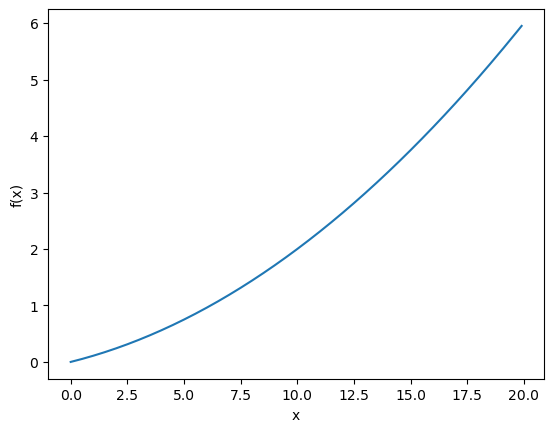

In [17]:
#eg1：y = 0.01x2 + 0.1x
def function_1(x):
    return 0.01*x**2 + 0.1*x
import numpy as np
import matplotlib.pylab as plt
x = np.arange(0.0, 20.0, 0.1) # 以 0.1 为单位，从 0 到 20 的数组 x
y = function_1(x) 
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [18]:
numerical_diff(function_1, 5) #这里的function_1是函数对象（不是函数调用结果），是为了得到function_1在x = 5的导数

0.1999999999990898

In [19]:
numerical_diff(function_1, 10)

0.2999999999986347

In [20]:
#偏导数：f（x0，x1） = x0**2 + x1**2
def function_2(x):
    return x[0]**2 + x[1]**2
# 或者 return np.sum(x**2)

#eg1：求 x0 = 3, x1 = 4 时，关于 x0 的偏导数
def function_tmp1(x0):
    return x0*x0 + 4.0**2.0
numerical_diff(function_tmp1, 3.0)


6.00000000000378

In [21]:
#eg2：求 x0 = 3, x1 = 4 时，关于 x0 的偏导数
def function_tmp2(x1):
    return 3.0**2.0 + x1*x1
numerical_diff(function_tmp2, 4.0)

7.999999999999119

3.梯度：由全部变量的偏导数汇总而成的向量称为梯度（gradient）

In [ ]:
def numerical_gradient(f, x): #参数 f 为函数，x 为 NumPy 数组，该函数对 NumPy 数组 x 的各个元素求数值微分
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # 生成和 x 形状相同的数组
    for idx in range(x.size): #size展示规模，x的元素个数为多少
        tmp_val = x[idx]
# f(x+h) 的计算
        x[idx] = tmp_val + h
        fxh1 = f(x) #这里x如果原先是array(3,4) 会变为（3.0001，4）
# f(x-h) 的计算 
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)  # 偏导数近似值
        x[idx] = tmp_val # 还原值
    return grad

In [95]:
a1 = numerical_gradient(function_2, np.array([3.0, 4.0])) #求点 (3, 4)的梯度
a2 = numerical_gradient(function_2, np.array([0.0, 2.0])) #求点 (0, 2)的梯度
a3 = numerical_gradient(function_2, np.array([3.0, 0.0])) #求点 (3, 0)的梯度
print(a1,a2,a3)

[6. 8.] [0. 4.] [6. 0.]


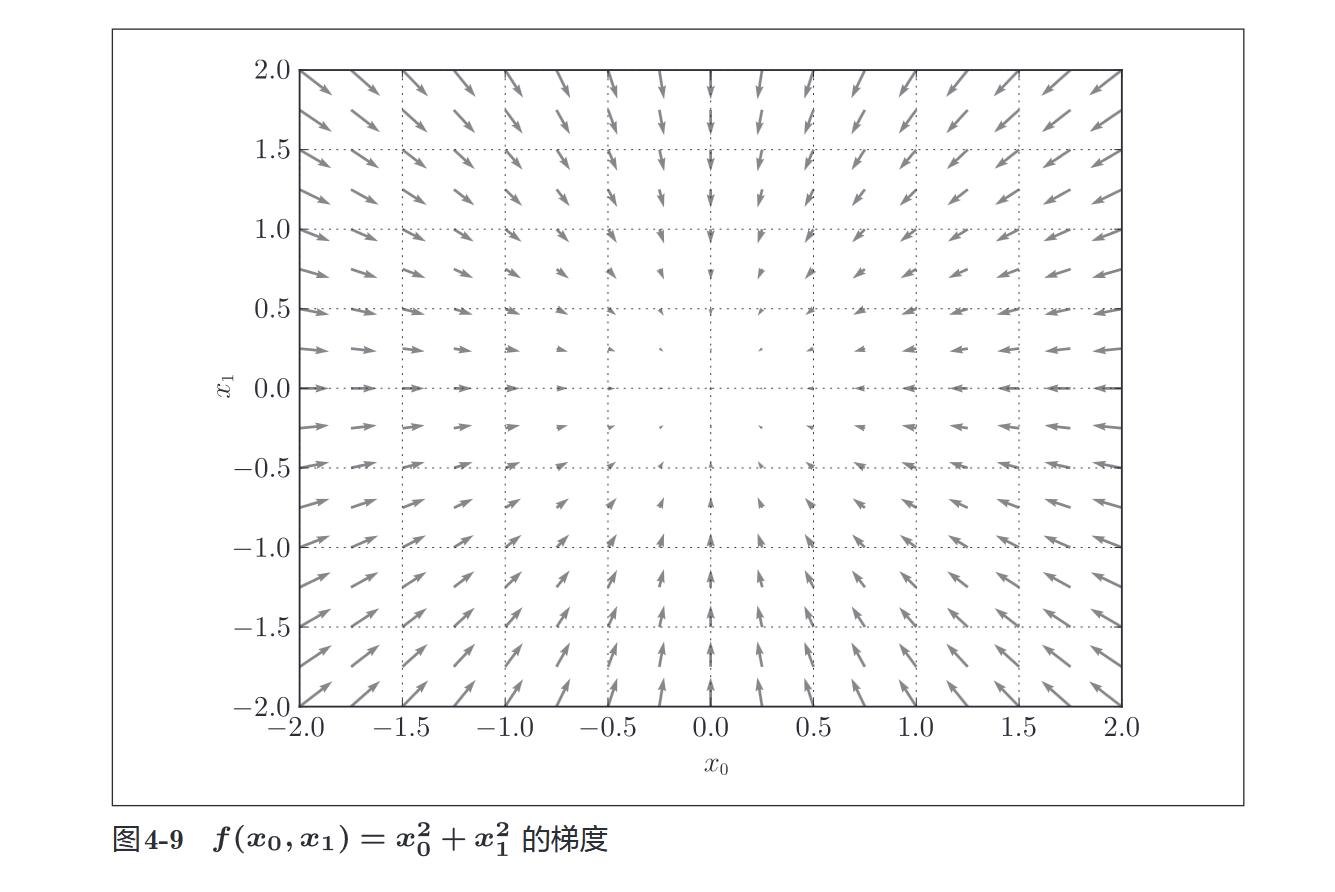

        梯度指示的方向是各点处的函数值减小最多的方向

函数的极小值、最小值以及被称为鞍点（saddle point）的地方，
梯度为 0。极小值是局部最小值，也就是限定在某个范围内的最
小值。鞍点是从某个方向上看是极大值，从另一个方向上看则是
极小值的点。虽然梯度法是要寻找梯度为 0 的地方，但是那个地
方不一定就是最小值（也有可能是极小值或者鞍点）。此外，当函
数很复杂且呈扁平状时，学习可能会进入一个（几乎）平坦的地区，
陷入被称为“学习高原”的无法前进的停滞期。

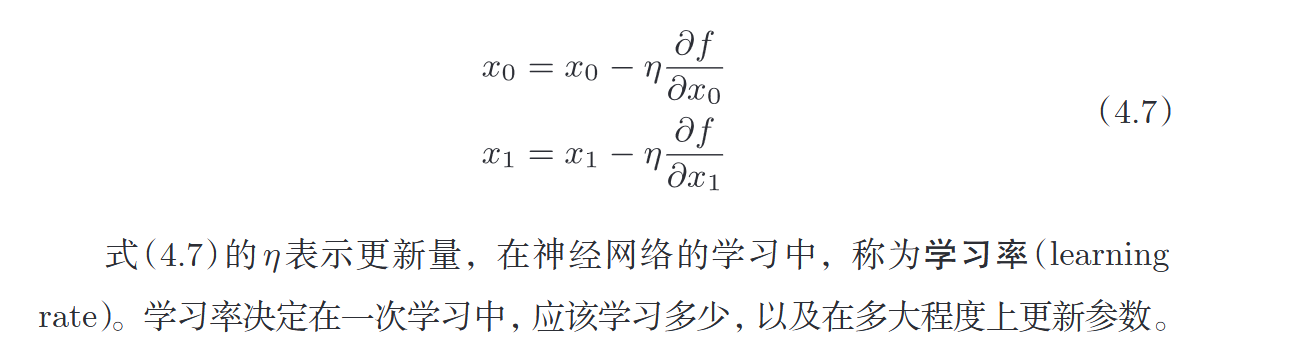

In [ ]:
def gradient_descent(f, init_x, lr=0.01, step_num=100):
    #参数 f 是要进行最优化的函数，init_x 是初始值，lr 是学习率 learning rate，step_num 是梯度法的重复次数
    x = init_x
    for i in range(step_num):
        grad = numerical_gradient(f, x)
        x -= lr * grad
    return x

In [ ]:
def function_2(x):
   return x[0]**2 + x[1]**2
init_x = np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)
#真的最小值就是 (0，0),答案很接近

array([-6.11110793e-10,  8.14814391e-10])

In [ ]:
#学习率过大的例子：lr=10.0 会发散成一个很大的值
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100))

#学习率过小的例子：lr=1e-10 基本上没怎么更新就结束了
init_x = np.array([-3.0, 4.0])
print(gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100))

[-2.58983747e+13 -1.29524862e+12]
[-2.99999994  3.99999992]


In [64]:
# coding: utf-8
#损失函数关于权重参数的梯度
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录中的文件而进行的设定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) #维度 (2, 3) 表示网络结构 两个特征 三分类问题

    def predict(self, x): #输入 x 是形状为 (1, 2) 的特征向量（或 (N, 2) 的批量数据）
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss
net = simpleNet()
print(net.W) # 随机权重参数

x = np.array([0.6, 0.9])
p = net.predict(x)
print(p)

print(np.argmax(p)) # 最大值的索引

t = np.array([0, 0, 1]) # 正确解标签
net.loss(x, t)

[[-0.0796667  -0.16091144  0.15642969]
 [-0.3051962  -0.0396848  -2.20478692]]
[-0.3224766  -0.13226319 -1.89045041]
1


2.450903000860695

In [65]:
def f(W):
    # W 是形式参数
    # 实际使用的 x 和 t 来自外部作用域
    return net.loss(x, t)
dW = numerical_gradient(f, net.W) #这里参数 x 取 net.W，并定义一个计算损失函数的新函数 f，也就是f(W)
print(dW) #结果是 dW，一个形状为 2 × 3 的二维数组

[[ 0.24814125  0.30012875 -0.54827   ]
 [ 0.37221188  0.45019313 -0.82240501]]


In [66]:
#lambda表达式  格式为：匿名函数 = lambda  变量（参数列表）:表达式
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.24814125  0.30012875 -0.54827   ]
 [ 0.37221188  0.45019313 -0.82240501]]


4.随机梯度下降法（SGD） 总结

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
#1.初始化方法 __init__
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01): #weight_init_std 标准差
        # 初始化权重，参数从头开始依次表示输入层的神经元数、隐藏层的神经元数、输出层的神经元数
        self.params = {} #在params中创建字典储存键值对，params 变量中保存了该神经网络所需的全部参数
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) 
        #生成一个形状为 (input_size, hidden_size) 的矩阵，元素服从标准正态分布（均值=0，标准差=1）
        self.params['b1'] = np.zeros(hidden_size) #隐藏层偏置（零初始化）
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size) #输出层偏置（零初始化）

#2.前向传播 predict()
    def predict(self, x): #参数 x 是图像数据
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1) #通过sigmoid激活函数得到隐藏层输出
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2) #通过softmax函数输出概率分布 y
        
        return y

#3.损失计算 loss()   
    # x:输入数据, t:监督数据
    def loss(self, x, t):  #t：真实标签（one-hot编码）
        y = self.predict(x)
        
        return cross_entropy_error(y, t) #计算交叉熵损失

#4. 准确率计算 accuracy() 
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1) # 预测类别 ：取概率最大的索引（argmax返回最大值索引）
        t = np.argmax(t, axis=1) # 真实类别 ：真实标签的one-hot表示
        
        accuracy = np.sum(y == t) / float(x.shape[0]) #sum(y == t)输出布尔数组的加和正确值；x.shape[0]输出样本数量
        return accuracy

#5.数值梯度计算 numerical_gradient()     
    # x:输入数据, t:监督数据
    def numerical_gradient(self, x, t): #计算权重参数的梯度
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t): #计算权重参数的梯度 高速版
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads  #梯度的信息将保存在 grads 变量中

In [ ]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
a = net.params['W1'].shape # (784, 100)，784输入节点*100隐藏节点 = 784 行 × 100 列
b = net.params['b1'].shape # (100,)
c = net.params['W2'].shape # (100, 10)
d = net.params['b2'].shape # (10,)
print(a,b,c,d)

(784, 100) (100,) (100, 10) (10,)


In [ ]:
#假设输入结果，梯度的信息将保存在 grads 变量中
x = np.random.rand(100, 784) # 伪输入数据（100 笔）
t = np.random.rand(100, 10) # 伪正确解标签（100 笔）
grads = net.numerical_gradient(x, t) # 计算梯度
grads['W1'].shape # (784, 100)
grads['b1'].shape # (100,)
grads['W2'].shape # (100, 10)
grads['b2'].shape # (10,)

train acc, test acc | 0.09035, 0.0892
train acc, test acc | 0.7974166666666667, 0.8024
train acc, test acc | 0.87595, 0.8783
train acc, test acc | 0.8986166666666666, 0.9015
train acc, test acc | 0.9083666666666667, 0.9117
train acc, test acc | 0.9152333333333333, 0.9186
train acc, test acc | 0.9184166666666667, 0.9211
train acc, test acc | 0.9222833333333333, 0.9256
train acc, test acc | 0.9255833333333333, 0.9299
train acc, test acc | 0.9285833333333333, 0.9315
train acc, test acc | 0.9332166666666667, 0.9343
train acc, test acc | 0.9354, 0.936
train acc, test acc | 0.9379166666666666, 0.9386
train acc, test acc | 0.9401833333333334, 0.9391
train acc, test acc | 0.9421666666666667, 0.9415
train acc, test acc | 0.9454166666666667, 0.9437
train acc, test acc | 0.9466333333333333, 0.9433


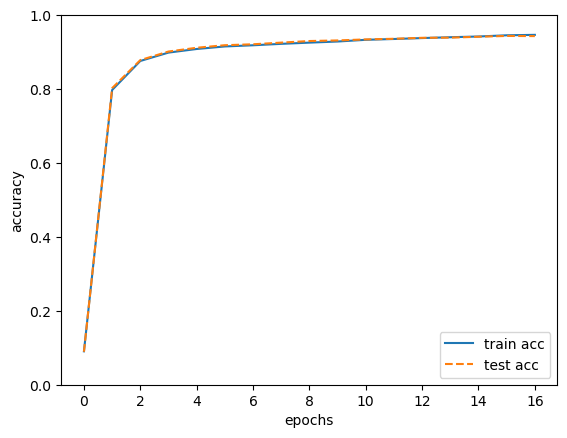

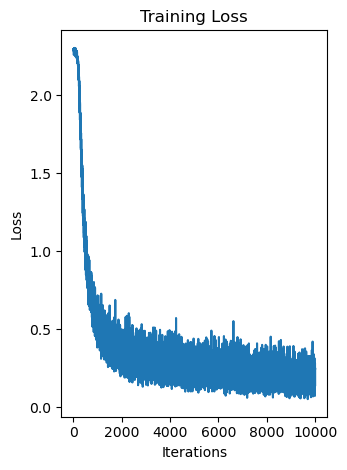

In [ ]:
#mini-batch 的NN_learn
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 为了导入父目录的文件而进行的设定
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from dataset.mnist import load_mnist


# 读入数据
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

#    创建一个输入层784节点（28x28像素）、隐藏层50节点、输出层10节点（对应0-9数字）的神经网络
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)


#超参数
iters_num = 10000  # 适当设定循环的次数
train_size = x_train.shape[0]  # MNIST训练集大小
batch_size = 100 # mini-batch大小
learning_rate = 0.1

train_loss_list = [] # 记录每次迭代的训练损失
train_acc_list = []  # 记录每个epoch结束时的训练准确率
test_acc_list = []   # 记录每个epoch结束时的测试准确率

iter_per_epoch = max(train_size / batch_size, 1) # 每个epoch需要 训练集大小 / 批量大小 = 60000/100 = 600 次迭代

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size) #从范围 [train_size, batch_size-1] 中随机选择 batch_size 个不重复的整数
    x_batch = x_train[batch_mask] #MNIST图像 小批量
    t_batch = t_train[batch_mask] #one-hot标签 小批量
    
    # 计算梯度
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch) #选择了反向传播
    
    # 更新参数
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]  #参数 = 参数 - 学习率 × 梯度
    
    # 记录损失
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss) #将损失值添加到列表中
    
    if i % iter_per_epoch == 0: #每个epoch结束时（每600次迭代）
        train_acc = network.accuracy(x_train, t_train) #计算模型在整个训练集上的准确率
        test_acc = network.accuracy(x_test, t_test) #计算模型在整个测试集上的准确率
        train_acc_list.append(train_acc) #记录这些准确率值
        test_acc_list.append(test_acc) #打印当前epoch和准确率信息
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# 绘制图形
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

# 绘制损失图像
plt.subplot(1, 2, 2)
x_iter = np.arange(len(train_loss_list))
plt.plot(x_iter, train_loss_list)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.tight_layout()
plt.show()